Arquivo 'producao.csv' de exemplo criado com sucesso.

--- Carregando o DataFrame ---
DataFrame carregado:
     produto  quantidade preco_medio  receita_total
0      Arroz         100        10.5   1.050000e+03
1     Feijão         150        20.0   3.000000e+03
2      Milho          75       15.75   1.181250e+03
3     Batata         -10         5.0  -5.000000e+01
4     Tomate         200        30.0   6.000000e+03
5     Alface          50        10.5   5.250000e+02
6    Cenoura         300        25.0   7.500000e+03
7      Milho       50000         5.0   2.500000e+05
8   Pimentão          95        18.0   1.710000e+03
9       Soja         120    invalido   1.440000e+03
10       NaN         100        22.0   2.200000e+03
11     Trigo          50        24.5   4.589988e+03
12   Abacaxi     8900000        38.9   3.588900e+02
13   Morango         100       40.13   5.657500e+02
14  Melancia          89       55.25   3.458700e+02
15     Melão         -45        60.0   8.900000e+06

Informaç

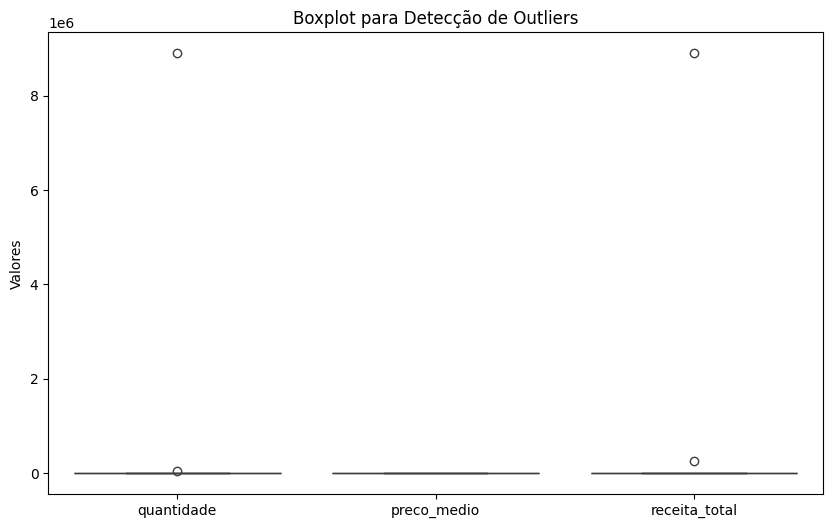

Análise do Boxplot: Os pontos que aparecem fora das 'linhas' (whiskers) do gráfico são considerados outliers potenciais e devem ser investigados.
Arquivo 'producao_corrigido.csv' de exemplo criado com sucesso.



In [3]:
# Importações
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Geração de um arquivo producao.csv de exemplo com problemas ---
data = {
    'produto': ['Arroz', 'Feijão', 'Milho', 'Batata', 'Tomate', 'Alface', 'Cenoura', 'Milho', 'Pimentão', 'Soja', None, 'Trigo', 'Abacaxi', 'Morango', 'Melancia', 'Melão'],
    'quantidade': [100, 150, 75, -10, 200, 50, 300, 50000, 95, 120, 100, 50, 8900000, 100, 89, -45],
    'preco_medio': [10.50, 20.00, 15.75, 5.00, 30.00, 10.50, 25.00, 5.00, 18.00, 'invalido', 22.00, 24.50, 38.90, 40.13, 55.25, 60.00],
    'receita_total': [1050.00, 3000.00, 1181.25, -50.00, 6000.00, 525.00, 7500.00, 250000.00, 1710.00, 1440.00, 2200.00, 4589.9876, 358.89, 565.75, 345.87, 8900000.00]
    
    
}
df_exemplo = pd.DataFrame(data)
df_exemplo.to_csv('producao.csv', index=False)

print("Arquivo 'producao.csv' de exemplo criado com sucesso.\n")


# --- 2. Carregando o dataset para a análise ---
print("--- Carregando o DataFrame ---")
try:
    df = pd.read_csv('producao.csv')
    print("DataFrame carregado:")
    print(df)
    print("\nInformações iniciais do DataFrame:")
    df.info()
except Exception as e:
    print(f"Erro ao carregar o arquivo: {e}")

# --- Início dos Testes de Qualidade de Dados ---

# ==============================================================================
# PARTE 1: TESTES DE INTEGRIDADE (Validade, Estrutura e Completude)
# ==============================================================================
print("\n\n--- PARTE 1: INICIANDO TESTES DE INTEGRIDADE ---")

# 1.1 Teste de Integridade de Entidade (Unicidade)
print("\n[1.1] Verificando produtos duplicados...")
duplicados = df['produto'].duplicated().sum()
if duplicados > 0:
    print(f"ALERTA: Encontrado(s) {duplicados} nome(s) de produto(s) duplicado(s).")
    print(df[df['produto'].duplicated(keep=False)])
else:
    print("SUCESSO: Nenhum produto duplicado encontrado.")

# 1.2 Teste de Integridade de Domínio (Valores Válidos)
print("\n[1.2] Verificando valores inválidos nas colunas numéricas...")
# Forçar colunas a serem numéricas, erros viram NaT/NaN (Não um Número)
df['preco_medio'] = pd.to_numeric(df['preco_medio'], errors='coerce')

# Verificar quantidades negativas
qtd_negativa = df[df['quantidade'] < 0]
if not qtd_negativa.empty:
    print(f"ALERTA: Encontrada(s) {len(qtd_negativa)} linha(s) com quantidade negativa.")
    print(qtd_negativa)
else:
    print("SUCESSO: Nenhuma quantidade negativa encontrada.")
    
# Verificar preços negativos
preco_negativo = df[df['preco_medio'] < 0]
if not preco_negativo.empty:
    print(f"ALERTA: Encontrada(s) {len(preco_negativo)} linha(s) com preço negativo.")
    print(preco_negativo)
else:
    print("SUCESSO: Nenhum preço negativo encontrado.")
    
# 1.3 Teste de Nulos (Completude)
print("\n[1.3] Verificando valores nulos...")
nulos = df.isnull().sum()
if nulos.sum() > 0:
    print("ALERTA: Foram encontrados valores nulos nas seguintes colunas:")
    print(nulos[nulos > 0])
else:
    print("SUCESSO: Nenhuma coluna com valores nulos.")


# ==============================================================================
# PARTE 2: TESTES DE CONSISTÊNCIA (Lógica Interna dos Dados)
# ==============================================================================
print("\n\n--- PARTE 2: INICIANDO TESTES DE CONSISTÊNCIA ---")
# O teste mais importante aqui é verificar se Receita Total = Quantidade * Preço Médio
print("\n[2.1] Verificando a consistência da Receita Total...")
df['receita_calculada'] = df['quantidade'] * df['preco_medio']

# Usamos uma tolerância para evitar problemas com arredondamento de ponto flutuante
tolerancia = 0.01 
df['diferenca_receita'] = abs(df['receita_total'] - df['receita_calculada'])

inconsistencias_receita = df[df['diferenca_receita'] > tolerancia]

if not inconsistencias_receita.empty:
    print(f"ALERTA: Encontrada(s) {len(inconsistencias_receita)} linha(s) com receita inconsistente.")
    print("As linhas abaixo possuem uma diferença maior que a tolerância de R$ {tolerancia}:")
    print(inconsistencias_receita[['produto', 'quantidade', 'preco_medio', 'receita_total', 'receita_calculada', 'diferenca_receita']])
else:
    print("SUCESSO: A Receita Total é consistente com a quantidade e o preço médio em todas as linhas.")


# ==============================================================================
# PARTE 3: TESTES DE PRECISÃO (Plausibilidade e Proximidade com a Realidade)
# ==============================================================================
print("\n\n--- PARTE 3: INICIANDO TESTES DE PRECISÃO (Plausibilidade) ---")
# A precisão real exigiria uma fonte externa. O que podemos fazer é testar
# a plausibilidade dos dados, principalmente buscando por outliers.

# 3.1 Análise de Outliers com Estatística Descritiva
print("\n[3.1] Análise descritiva para identificar outliers...")
print(df[['quantidade', 'preco_medio', 'receita_total']].describe())
print("\nAnálise dos resultados do describe():")
print("- Verifique os valores 'min' e 'max'. Eles fazem sentido para o negócio?")
print("- Compare o '75%' com o 'max'. Uma diferença muito grande pode indicar um outlier.")
print("- Exemplo no nosso dataset: a 'quantidade' max de 50000 parece um outlier.")

# 3.2 Análise Visual de Outliers com Boxplot
print("\n[3.2] Gerando Boxplot para análise visual de outliers...")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['quantidade', 'preco_medio', 'receita_total']])
plt.title('Boxplot para Detecção de Outliers')
plt.ylabel('Valores')
plt.show()
print("Análise do Boxplot: Os pontos que aparecem fora das 'linhas' (whiskers) do gráfico são considerados outliers potenciais e devem ser investigados.")

# ==============================================================================
# 4. GERAÇÃO DO ARQUIVO CSV CORRIGIDO
# ==============================================================================
df_exemplo = pd.DataFrame(data)
df_exemplo.to_csv('producao_corrigido.csv', index=False)

print("Arquivo 'producao_corrigido.csv' de exemplo criado com sucesso.\n")